In [184]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [185]:
import csv
from sklearn.preprocessing import StandardScaler
X,Y = [], []
with open('/Users/ratan/PycharmProjects/feature_all.csv', newline='\n') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
    label, features = int(row[0]), [float(feature.split(':')[1]) for feature in row[1:-2]]
    X.append(features)
    Y.append(label)

In [186]:
C_2d_range = [1e-3,1e-2,1e-1,1,1e1, 1e2]
gamma_2d_range =[1e-3,1e-2,1e-1,1,1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

In [187]:
# clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
# clf = svm.SVC(C=1000, gamma=0.01, decision_function_shape='ovo')
#  clf = tree.DecisionTreeClassifier()

In [188]:
# clf.fit(X, Y)

In [189]:
M,N = [], []
with open('/Users/ratan/PycharmProjects/feature_all_test.csv', newline='\n') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
    label, features = int(row[0]), [float(feature.split(':')[1]) for feature in row[1:-2]]
    M.append(features)
    N.append(label)
print(len(M))

26


In [190]:
predictscore=[]
gammas = []
cs=[]
for (k, (C, gamma, clf)) in enumerate(classifiers):
    predictscore.append(clf.score(M,N))
    gammas.append(gamma)
    cs.append(C)

print(predictscore)
print(gammas)
print(cs)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078]
[0.001, 0.01, 0.1, 1, 10.0, 0.001, 0.01, 0.1, 1, 10.0, 0.001, 0.01, 0.1, 1, 10.0, 0.001, 0.01, 0.1, 1, 10.0, 0.001, 0.01, 0.1, 1, 10.0, 0.001, 0.01, 0.1, 1, 10.0]
[0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 10.0, 10.0, 10.0, 10.0, 10.0, 100.0, 100.0, 100.0, 100.0, 100.0]


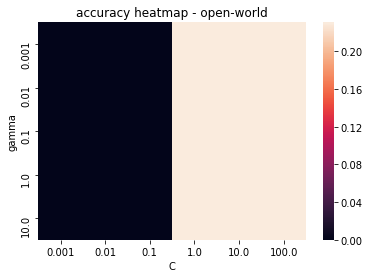

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(data={'gamma':gammas, 'C':cs, 'score':predictscore})
data = data.pivot(index='gamma', columns='C', values='score')
sns.heatmap(data)
plt.title('accuracy heatmap - open-world')
plt.show()

In [151]:
clf.score(M,N)

0.72

In [140]:
ind=0
for x in M:
    print(clf.predict([x]), N[ind])
    ind = ind+1

[88] 86
[67] 67
[16] 16
[40] 40
[72] 72
[42] 42
[85] 85
[10] 10
[88] 72
[46] 46
[51] 51
[9] 9
[36] 36
[26] 26
[68] 68
[44] 44
[86] 86
[88] 9
[20] 20
[2] 2
[54] 54
[88] 15
[77] 77
[31] 31
[88] 57
